<a href="https://colab.research.google.com/github/Bia-byte/Lista-1/blob/main/Exercicio8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Exercício 8 - Letra A

# Verifique que f(x) é uma densidade válida
# 1) f(x) precisa ser sempre não negativa
# 2) A área total sob a curva da função densidade deve ser igual a 1

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Definição da função densidade de probabilidade f(x)
f = lambda x: 3*x**2

# Cálculo da integral de f(x) no intervalo [0,1]
# Para ser uma função densidade de probabilidade válida, essa integral deve ser igual a 1
integral, error = spi.quad(f, 0, 1)

if integral == 1.0:
    print("A área total sob a curva da função densidade é igual a 1.")
else:
    print("A área total sob a curva da função densidade não é igual a 1.")

# Verifica se f(x) é sempre não negativa no intervalo [0,1]
x_values = np.linspace(0, 1, 100)  # Gera 100 pontos entre 0 e 1
f_values = f(x_values)  # Avalia f(x) nesses pontos

if np.all(f_values >= 0):  # Confirma se todos os valores são não negativos
    print("A função f(x) é sempre positiva ou zero.")
    cont = 0
else:
    print("A função f(x) assume valores negativos.")
    cont = 1

# Verifica se ambas as condições foram satisfeitas
if integral == 1.0 and cont == 0:
    print("A função f(x) é uma densidade válida.")
else:
    print("A função f(x) não é uma densidade válida.")


A área total sob a curva da função densidade é igual a 1.
A função f(x) é sempre positiva ou zero.
A função f(x) é uma densidade válida.


In [21]:
# Exercício 8 - Letra B

import numpy as np
import scipy.integrate as spi

# Definição das funções
g = lambda x: 2*x    # Distribuição candidata
f = lambda x: 3*x**2  # Distribuição alvo

# Vendo se a distribuição candidata está ok!
# Cálculo da integral de g(x) no intervalo [0,1]
# Para ser uma função densidade de probabilidade válida, essa integral deve ser igual a 1
integral, error = spi.quad(g, 0, 1)

if integral == 1.0:
    print("A área total sob a curva da função g(x) é igual a 1.")
else:
    print("A área total sob a curva da função g(x) não é igual a 1.")

# Verifica se g(x) é sempre não negativa no intervalo [0,1]
x_values = np.linspace(0, 1, 100)  # Gera 100 pontos entre 0 e 1
g_values = g(x_values)  # Avalia g(x) nesses pontos

if np.all(g_values >= 0):  # Confirma se todos os valores são não negativos
    print("A função g(x) é sempre positiva ou zero.")
    cont = 0
else:
    print("A função g(x) assume valores negativos.")
    cont = 1

# Verifica se ambas as condições foram satisfeitas
if integral == 1.0 and cont == 0:
    print("A função g(x) é uma densidade candidata válida.")
else:
    print("A função g(x) não é uma densidade candidata válida.")

razao = lambda x: f(x) / g(x)  # Razão f(x)/g(x)

# Encontrar o valor máximo da razão no intervalo [0,1]
x_values = np.linspace(0.01, 1, 1000)  # Evita divisão por zero em x=0
c_max = np.max(razao(x_values))

print("O valor da constante c é: " + str(c_max))

A área total sob a curva da função g(x) é igual a 1.
A função g(x) é sempre positiva ou zero.
A função g(x) é uma densidade candidata válida.
O valor da constante c é: 1.5


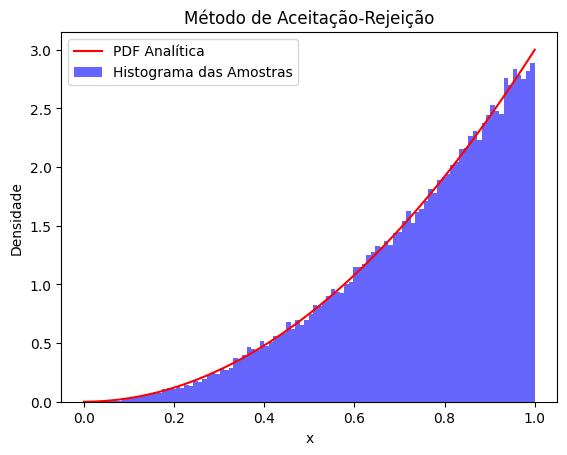

In [26]:
# Exercício 8 - Letra C
# Geração de valores usando o método de aceitação-rejeição

import numpy as np
import matplotlib.pyplot as plt

# Número de amostras desejadas
n = 100000
x_samples = np.array([])

# Loop para gerar amostras usando aceitação-rejeição
for i in range(n):
    # Passo 1: Gerar uma amostra Y da distribuição candidata g(x) = 2x
    y = np.random.uniform(0, 1)**0.5  # Inversa da CDF de g(x)

    # Passo 2: Gerar uma variável U independente de Y, uniforme em [0,1]
    u = np.random.uniform(0, 1)

    # Passo 3: Teste de aceitação: verificar se U <= f(Y) / (c * g(Y))
    if u <= (3 * y**2) / (1.5 * 2 * y):  # c = 1.5, g(y) = 2y
        x_samples = np.append(x_samples, y)  # Aceita Y como amostra de X
    # Se o Passo 3 não for satisfeito ele não entra dentro do if, ou seja rejeita Y como amostra de X
    # então volta para o loop no Passo 1 para gerar os novos valores

# Plotagem da PDF analítica e do histograma das amostras geradas
X = np.linspace(0, 1, 100)
fX = 3 * X**2  # PDF analítica f(x)

plt.plot(X, fX, label="PDF Analítica", color='red')
plt.hist(x_samples, bins=100, density=True, alpha=0.6, color='blue', label="Histograma das Amostras")
plt.xlabel("x")
plt.ylabel("Densidade")
plt.legend()
plt.title("Método de Aceitação-Rejeição")
plt.show()
